In [ ]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("zameen-updated.csv")
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [ ]:
# Print the column names
print("Column Names:")
df.columns

Column Names:


Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

In [ ]:
# total rows and columns
df.shape

(168446, 20)

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
property_id,168446.00,15596255.49,2251206.87,86575.00,14883201.75,16658506.00,17086619.75,17357718.00
location_id,168446.00,4375.94,3776.56,1.00,1058.00,3286.00,7220.00,14220.00
price,168446.00,17765759.83,35310032.32,0.00,175000.00,8500000.00,19500000.00,2000000000.00
latitude,168446.00,29.86,3.81,11.05,24.95,31.46,33.56,73.18
longitude,168446.00,71.24,3.13,25.91,67.13,73.06,73.26,80.16
baths,168446.00,2.87,2.46,0.00,0.00,3.00,4.00,403.00
bedrooms,168446.00,3.18,1.97,0.00,2.00,3.00,4.00,68.00
Area Size,168446.00,5.89,5.78,0.00,3.00,5.00,8.00,800.00


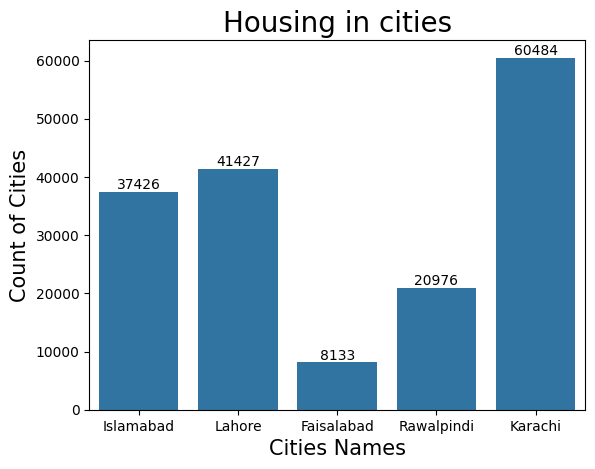

In [ ]:
ax = sns.countplot(x='city', data=df)
plt.title('Housing in cities', fontsize=20)
plt.xlabel("Cities Names", fontsize=15)
plt.ylabel("Count of Cities", fontsize=15)

for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha="center", va="bottom", fontsize=10)

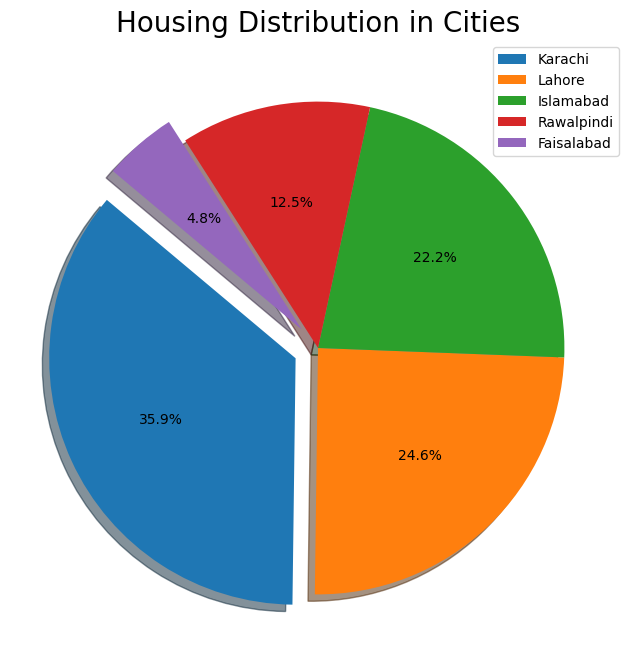

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['city'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Karachi', 'Lahore', 'Islamabad', 'Rawalpindi','Faisalabad'])
plt.title('Housing Distribution in Cities', fontsize=20)
plt.axis('off');

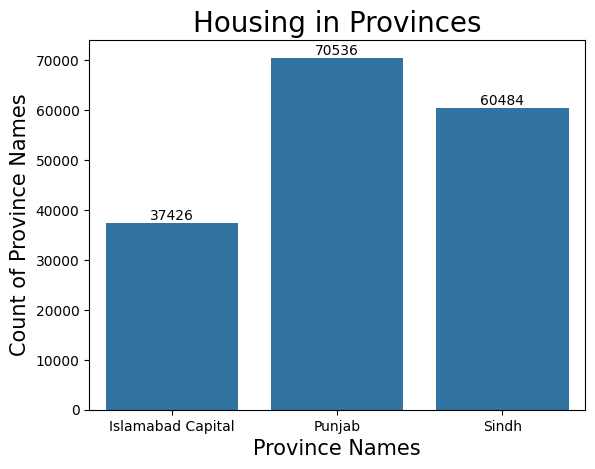

In [ ]:
sns.countplot(x='province_name', data=df)
plt.title('Housing in Provinces', fontsize=20)
plt.xlabel("Province Names", fontsize=15)
plt.ylabel("Count of Province Names", fontsize=15)

# Annotate the bars with counts
for index, value in enumerate(df['province_name'].value_counts().sort_index()):
    plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize=10)

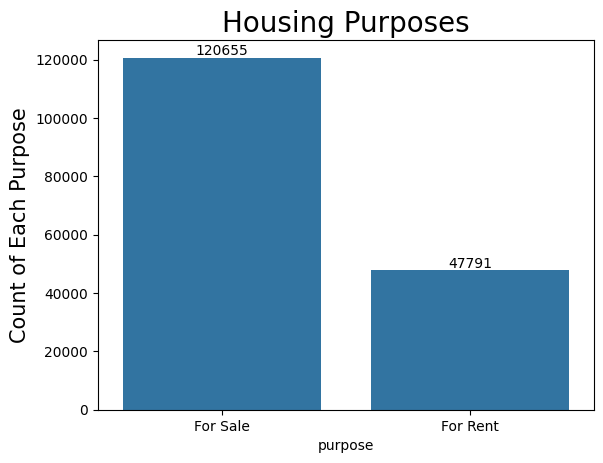

In [ ]:
ax = sns.countplot(x='purpose', data=df)
plt.title('Housing Purposes', fontsize=20)
plt.ylabel("Count of Each Purpose", fontsize=15)

for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha="center", va="bottom", fontsize=10)

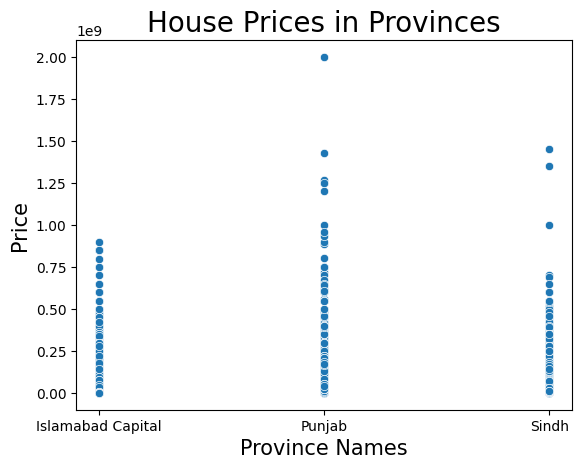

In [ ]:
sns.scatterplot(x='province_name', y='price', data=df)
plt.title('House Prices in Provinces', fontsize=20)
plt.xlabel('Province Names', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

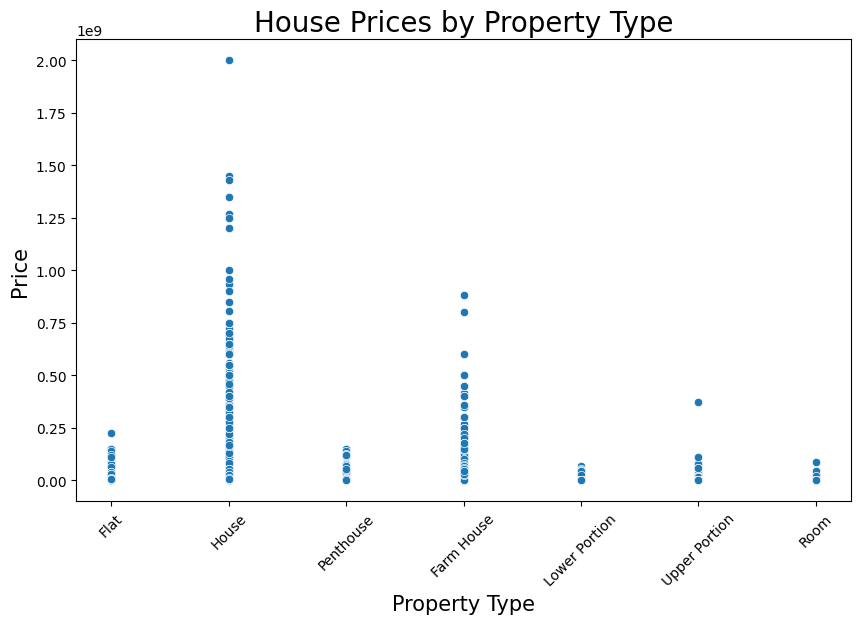

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title('House Prices by Property Type', fontsize=20)
plt.xlabel('Property Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [ ]:
print(df['bedrooms'].value_counts())

bedrooms
3     45867
2     30741
5     23452
4     23027
0     22704
6     11929
1      4434
7      2973
8      1451
9       782
10      611
11      416
12       25
14        8
15        7
16        4
28        4
13        3
25        3
18        2
21        1
68        1
27        1
Name: count, dtype: int64


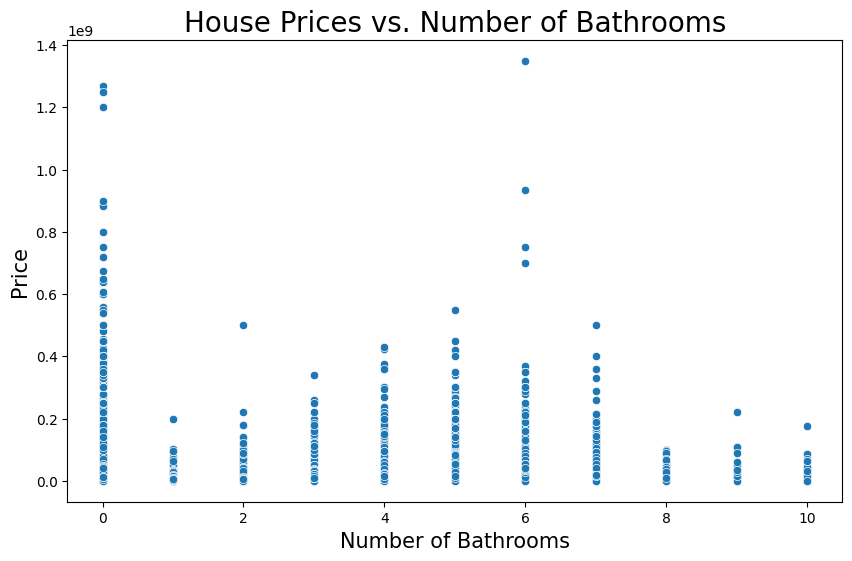

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame to include only houses with 5 or fewer bedrooms
df_filtered = df[df['bedrooms'] <= 5]

# Scatter Plot of House Prices vs. Number of Bathrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baths', y='price', data=df_filtered)
plt.title('House Prices vs. Number of Bathrooms', fontsize=20)
plt.xlabel('Number of Bathrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()


In [ ]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

In [ ]:
# Check unique values in categorical columns to identify inconsistencies
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}
unique_values

{'page_url': array(['https://www.zameen.com/Property/g_10_g_10_2_ground_floor_corner_apartment_with_green_lawn_for_sale-237062-3325-1.html',
        'https://www.zameen.com/Property/e_11_2_services_society_flat_available_for_sale-346905-3236-1.html',
        'https://www.zameen.com/Property/islamabad_g_15_house_is_available_for_sale-386513-764-1.html',
        ...,
        'https://www.zameen.com/Property/gulshan_e_maymar_gulshan_e_maymar_sector_u_ground_1st_floor_house_is_available_for_sale-17355250-6757-1.html',
        'https://www.zameen.com/Property/gulshan_e_maymar_gulshan_e_maymar_sector_p_1st_floor_flat_is_available_for_sale-17355251-6752-1.html',
        'https://www.zameen.com/Property/bahria_town_karachi_bahria_town_precinct_31_good_location_luxurious_villa_for_sale_in_precicnt_31_of_bahria_town_karachi-17355287-10045-1.html'],
       dtype=object),
 'property_type': array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
        'Upper Portion', 'Room'], dtype=o

In [ ]:
# List of specific columns to check unique values
specific_columns = ['price', 'baths', 'bedrooms', 'Area Size']

# Get unique values for the specified columns
unique_values_specific = {col: df[col].unique() for col in specific_columns}
unique_values_specific


{'price': array([10000000,  6900000, 16500000, ...,  9010000,  1247000,   421000]),
 'baths': array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
         12, 403,  14]),
 'bedrooms': array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10, 12,  9, 11, 14, 15, 16, 13,
        18, 28, 25, 21, 68, 27]),
 'Area Size': array([4.000e+00, 5.600e+00, 8.000e+00, 2.000e+00, 1.600e+00, 1.000e+00,
        6.200e+00, 7.100e+00, 7.800e+00, 4.500e+00, 1.000e+01, 3.100e+00,
        1.500e+00, 1.400e+01, 5.000e+00, 6.000e+00, 8.400e+00, 4.700e+00,
        1.200e+01, 4.300e+00, 1.780e+01, 6.700e+00, 5.300e+00, 2.100e+00,
        2.500e+00, 1.200e+00, 1.330e+01, 2.400e+00, 1.600e+01, 9.300e+00,
        9.000e+00, 1.100e+01, 7.500e+00, 1.800e+01, 3.000e+00, 6.500e+00,
        1.100e+00, 9.700e+00, 7.000e+00, 3.800e+00, 5.500e+00, 4.400e+00,
        2.200e+00, 8.900e+00, 3.200e+00, 9.600e+00, 9.800e+00, 1.020e+01,
        1.140e+01, 1.310e+01, 4.800e+00, 7.600e+00, 5.400e+00, 1.340e+01,
        

# Missing Values

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [ ]:
missing_values(df)

,Missing_Number,Missing_Percent
agent,44072,0.261639
agency,44071,0.261633


In [ ]:
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)

In [ ]:
missing_values(df)

,Missing_Number,Missing_Percent


# **Inconsistencies**

In [ ]:
# check dates correct format
df['date_added'] = pd.to_datetime(df['date_added'])

# **Handle Outliers**

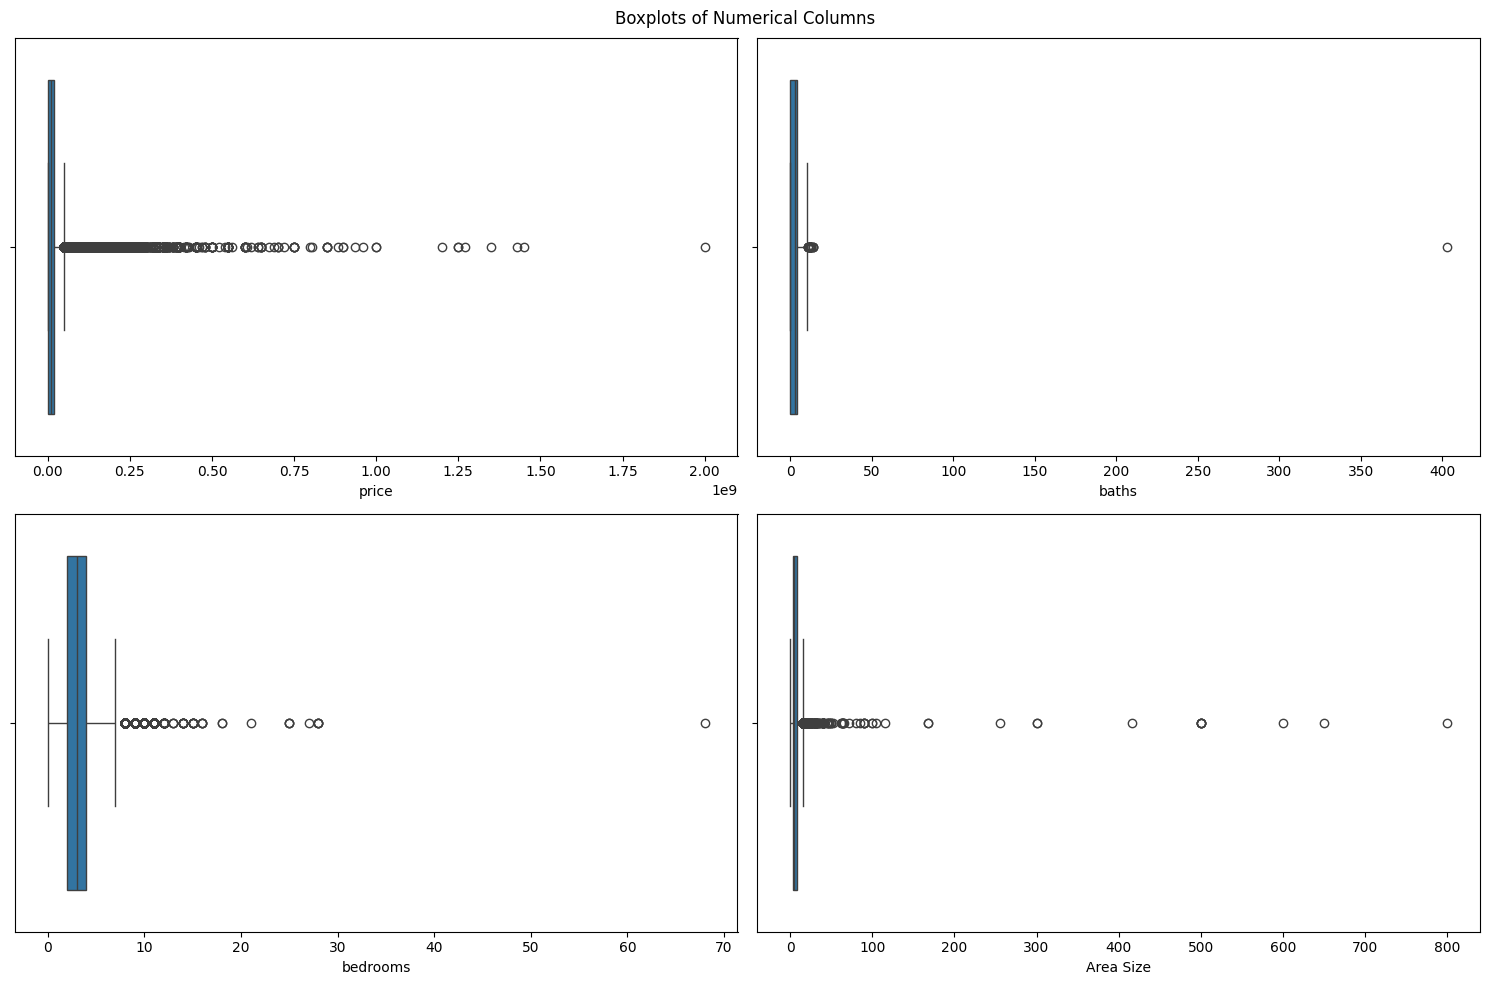

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns to check for outliers
numerical_columns = ['price', 'baths', 'bedrooms', 'Area Size']

# Visualize outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Numerical Columns')

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to relevant columns
for col in ['price', 'baths', 'bedrooms', 'Area Size']:
    data = remove_outliers(df, col)

# Cap remaining outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Apply to relevant columns
for col in ['price', 'baths', 'bedrooms', 'Area Size']:
    cap_outliers(data, col)

# Use Z-score method for further refinement
z_scores = stats.zscore(data[['price', 'baths', 'bedrooms', 'Area Size']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]

<ipython-input-140-51e58f1e2bff>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
<ipython-input-140-51e58f1e2bff>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
<ipython-input-140-51e58f1e2bff>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

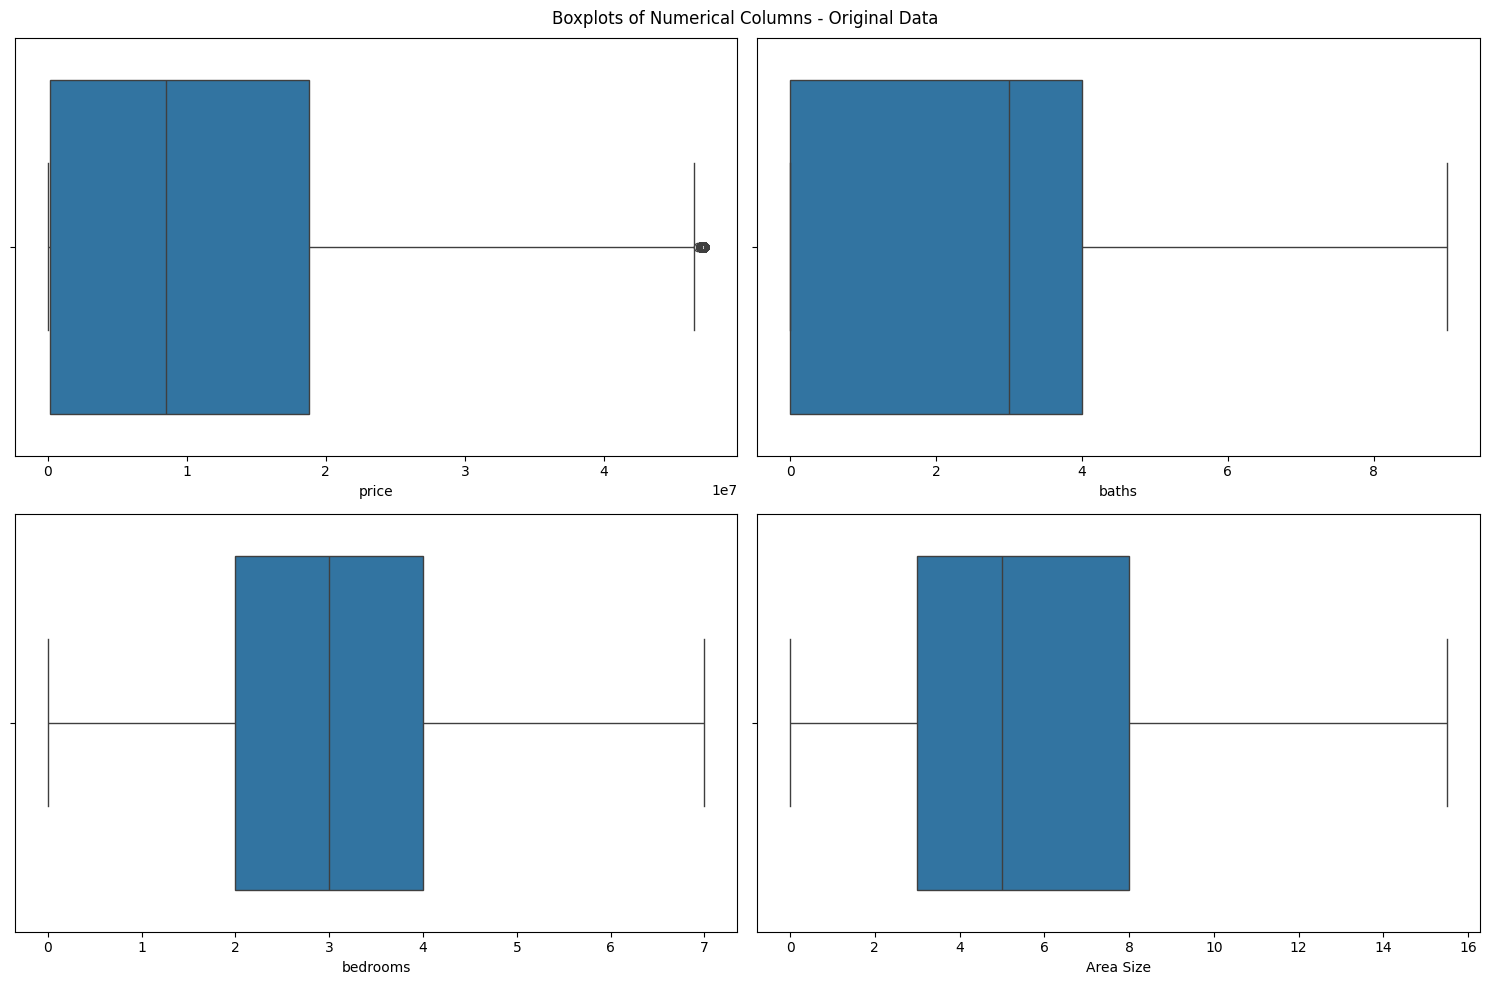

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Numerical Columns - Original Data')

for i, col in enumerate(['price', 'baths', 'bedrooms', 'Area Size']):
    sns.boxplot(data=data_cleaned, x=col, ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

# **Feature Engineering**

In [ ]:
# Age of the House
df['year_built'] = df['date_added'].dt.year
df['age'] = 2024 - df['year_built']

In [ ]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,year_built,age
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,For Sale,2,2019-02-04,Unknown,Unknown,Marla,4.0,0-5 Marla,2019,5
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,For Sale,3,2019-05-04,Unknown,Unknown,Marla,5.6,5-10 Marla,2019,5
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,For Sale,5,2019-07-17,Unknown,Unknown,Marla,8.0,5-10 Marla,2019,5
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,For Sale,4,2019-04-05,Unknown,Unknown,Kanal,2.0,1-5 Kanal,2019,5
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,...,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,2019,5


In [ ]:
# ensuruing no missing values
df['age'] = df['age'].fillna(df['age'].median())

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])

In [ ]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,year_built,age
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,488,Islamabad,Islamabad Capital,33.679890,73.012640,...,For Sale,2,2019-02-04,Unknown,Unknown,Marla,4.0,0-5 Marla,2019,5
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,415,Islamabad,Islamabad Capital,33.700993,72.971492,...,For Sale,3,2019-05-04,Unknown,Unknown,Marla,5.6,5-10 Marla,2019,5
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,493,Islamabad,Islamabad Capital,33.631486,72.926559,...,For Sale,5,2019-07-17,Unknown,Unknown,Marla,8.0,5-10 Marla,2019,5
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,211,Islamabad,Islamabad Capital,33.707573,73.151199,...,For Sale,4,2019-04-05,Unknown,Unknown,Kanal,2.0,1-5 Kanal,2019,5
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,351,Islamabad,Islamabad Capital,33.492591,73.301339,...,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,2019,5


# **Outlier Analysis**

In [ ]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,year_built,age
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,488,Islamabad,Islamabad Capital,33.679890,73.012640,...,For Sale,2,2019-02-04,Unknown,Unknown,Marla,4.0,0-5 Marla,2019,5
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,415,Islamabad,Islamabad Capital,33.700993,72.971492,...,For Sale,3,2019-05-04,Unknown,Unknown,Marla,5.6,5-10 Marla,2019,5
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,493,Islamabad,Islamabad Capital,33.631486,72.926559,...,For Sale,5,2019-07-17,Unknown,Unknown,Marla,8.0,5-10 Marla,2019,5
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,211,Islamabad,Islamabad Capital,33.707573,73.151199,...,For Sale,4,2019-04-05,Unknown,Unknown,Kanal,2.0,1-5 Kanal,2019,5
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,351,Islamabad,Islamabad Capital,33.492591,73.301339,...,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,2019,5


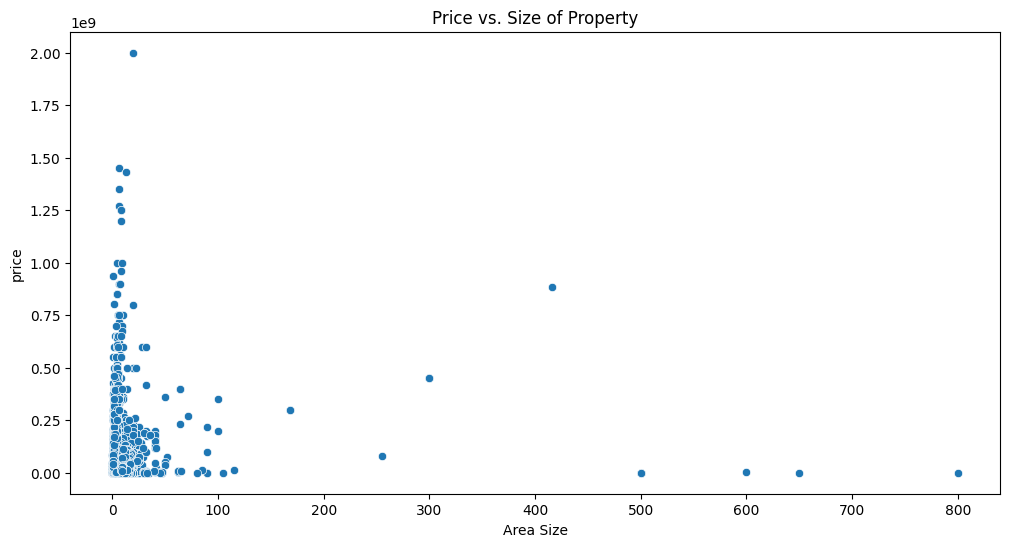

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for price vs. size
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Area Size', y='price')
plt.title('Price vs. Size of Property')
plt.show()

In [ ]:
# Select only the numerical columns before calculating the correlation
numerical_df = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             property_id  location_id     price  location  latitude  \
property_id     1.000000     0.006564 -0.029669 -0.038634 -0.010461   
location_id     0.006564     1.000000 -0.098426  0.040683 -0.293129   
price          -0.029669    -0.098426  1.000000 -0.046053 -0.071193   
location       -0.038634     0.040683 -0.046053  1.000000 -0.073007   
latitude       -0.010461    -0.293129 -0.071193 -0.073007  1.000000   
longitude      -0.002722    -0.282903 -0.019225 -0.026089  0.926888   
baths          -0.101769    -0.121941  0.230205 -0.082853  0.053107   
bedrooms       -0.066577    -0.138452  0.314145 -0.032664  0.030961   
Area Size       0.002448     0.044766 -0.009549 -0.000794 -0.014124   
year_built      0.381248    -0.004722  0.026773 -0.061872  0.024798   
age            -0.381248     0.004722 -0.026773  0.061872 -0.024798   

             longitude     baths  bedrooms  Area Size  year_built       age  
property_id  -0.002722 -0.101769 -0.066577   0.00

In [ ]:
# Count the occurrences of True and False in the 'location_G-10' column
counts = df['location'].value_counts()

# Display the counts
print(counts)

location
351     22046
201      8548
202      8502
200      6429
573      5877
        ...  
481         1
1274        1
567         1
1464        1
1391        1
Name: count, Length: 1509, dtype: int64


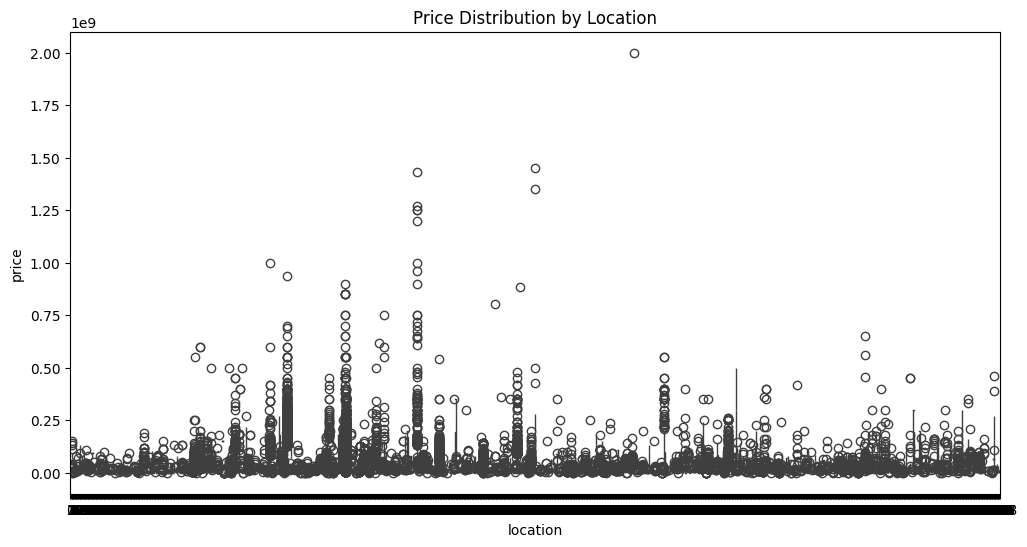

In [ ]:
# Box plot for price by location
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='location', y='price')
plt.title('Price Distribution by Location')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category', 'year_built', 'age'],
      dtype='object')

In [ ]:
features = df.select_dtypes(include=['float', 'int'])
non_numeric_cols = df.select_dtypes(exclude=['float', 'int']).columns
print("Non-numerical columns:", non_numeric_cols)

Non-numerical columns: Index(['page_url', 'property_type', 'city', 'province_name', 'area', 'purpose',
       'date_added', 'agency', 'agent', 'Area Type', 'Area Category'],
      dtype='object')


In [ ]:
# Drop non-numerical columns (assuming they are not relevant for this model)
df = df.drop(columns=non_numeric_cols)  # Modify this line to drop from df, not features

In [ ]:
df = df.drop(columns='location_id')

In [ ]:
df = df.drop(columns='latitude')
df = df.drop(columns='longitude')
df = df.drop(columns='year_built')

In [ ]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [ ]:
print("Features used for training:")
print(X_train.columns.tolist())

Features used for training:
['property_id', 'location', 'baths', 'bedrooms', 'Area Size', 'age']


In [ ]:

mse = mean_squared_error(y_test, lr_preds)
rmse = mean_squared_error(y_test, lr_preds, squared=False)
r2 = r2_score(y_test, lr_preds)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 1041231008677554.6
Root Mean Squared Error: 32268111.32802096
R-squared: 0.10170492788361996


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)

print('Mean Squared Error:', rf_mse)
print('Root Mean Squared Error:', rf_rmse)
print('R-squared:', rf_r2)

Mean Squared Error: 645656671028587.5
Root Mean Squared Error: 25409775.107792426
R-squared: 0.44297643747598325


In [ ]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [ ]:
gb_mse = mean_squared_error(y_test, gb_preds)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)
gb_r2 = r2_score(y_test, gb_preds)

print('Mean Squared Error:', gb_mse)
print('Root Mean Squared Error:', gb_rmse)
print('R-squared:', gb_r2)

Mean Squared Error: 775613851117626.5
Root Mean Squared Error: 27849844.723402437
R-squared: 0.330859247834855


In [ ]:
# Choose the best model based on metrics
best_model_name = None
best_model = None
best_mse = min(mse, rf_mse, gb_mse)
if best_mse == mse:
    best_model_name = "Linear Regression"
    best_model = lr_model
elif best_mse == rf_mse:
    best_model_name = "Random Forest"
    best_model = rf_model
else:
    best_model_name = "Gradient Boosting"
    best_model = gb_model

print(f"The best model is {best_model_name}")

The best model is Random Forest


In [ ]:
import joblib
joblib.dump(rf_model, 'Random-Forest_model.pkl')

['Random-Forest_model.pkl']

# **Predictions**

In [ ]:
import pandas as pd
import joblib
from datetime import datetime

# Load the trained model
model = joblib.load('Random-Forest_model.pkl')

# Prepare hypothetical scenarios
hypothetical_data = pd.DataFrame({
    'property_id': [237062, 234543, 445234],
    'location': [211, 493, 2181],
    'baths': [3, 4, 2],
    'bedrooms': [4, 5, 3],
    'Area Size': [2500, 3000, 1500],
    'age': [2024 - 2010, 2024 - 2000, 2024 - 2015]  # Assume these are the encoded values for the locations
})

# Predict house prices for the hypothetical scenarios
predicted_prices = model.predict(hypothetical_data)

# Combine hypothetical scenarios with their predicted prices
predicted_prices_formatted = ["{:,}".format(int(price)) for price in predicted_prices]
hypothetical_data['predicted_price'] = predicted_prices_formatted
# Print the results
print(hypothetical_data)

# Save the results to a CSV file
#hypothetical_data.to_csv('hypothetical_predictions.csv', index=False)


   property_id  location  baths  bedrooms  Area Size  age predicted_price
0       237062       211      3         4       2500   14     182,311,600
1       234543       493      4         5       3000   24     159,050,400
2       445234      2181      2         3       1500    9     152,251,570
